# Статистический анализ данных

# Введение:

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках

# Цель исследования:

Необходимо проанализировать данные популярного сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые помогут бизнесу вырасти.


# Ход исследования:

1. Изучить данные
2. Выполнить предобработку данных
3. Выполнить исследовательский анализ данных
4. Объединить данные
5. Подсчетать выручки
6. Проверить гипотезы
7. Написать вывод


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных

##### Сохраним данные в датафреймы

In [2]:
user_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

##### Выведим первые строки каждого набора данных, основную информацию о датафреймах с помощью метода `info()` и найдем явные дубликаты:

In [3]:
def data_frame(x):
    print(x.head(10)) 
    print('*'*50)
    print(x.info())
    print('*'*50)
    print('Количество дубликатов:', x.duplicated().sum())
    

In [4]:
data_frame(user_go)

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
5        6      Регина   25       Краснодар             ultra
6        7       Игорь   23            Омск             ultra
7        8        Юрий   23       Краснодар             ultra
8        9          Ян   21       Пятигорск             ultra
9       10     Валерий   18    Екатеринбург             ultra
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name           

In [5]:
data_frame(rides_go)

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
5        1  2770.890808  16.650138  2021-10-09
6        1  3039.020292  14.927879  2021-10-19
7        1  2842.118050  23.117468  2021-11-06
8        1  3412.690668  15.238072  2021-11-14
9        1   748.690645  15.041884  2021-11-22
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
*********************

In [6]:
data_frame(subscriptions_go)

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None
**************************************************
Количество дубликатов: 0


**Промежуточный вывод на основе изученной общей информации:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. Таблицы состоят из 1565 (user_go), 18068 (rides_go) и 2 (subscriptions_go) записей.
2. Найдено 31 дубликата в таблице user_go.
3. Пропусков не найдено.
4. Есть некорректный тип данных у таблицы rides_go в столбце date。
5. Название столбцов корректны.
   
</div>

#### Шаг 2. Предобработка данных

#####  Заменим некорректные типы данных:

In [7]:
# Приведем к корректному формату date в датафрейме rides_go:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

In [8]:
# Приведем к корректному формату duration в датафрейме rides_go:
rides_go['duration'] = np.ceil(rides_go['duration'])

In [9]:
# Проверим формат date в датафрейме rides_go:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,26.0,2021-01-01
1,1,2617.592153,16.0,2021-01-18
2,1,754.159807,7.0,2021-04-20
3,1,2694.783254,19.0,2021-08-11
4,1,4028.687306,27.0,2021-08-28


##### Добавим в датафрейм  rides_go новый столбец

In [10]:
rides_go['month'] = rides_go['date'].dt.month   

In [11]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


##### Округлим в датафрейме rides_go  значения:

In [12]:
rides_go['distance'] = rides_go['distance'].round(2)  


In [13]:
rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.92,26.0,2021-01-01,1
1,1,2617.59,16.0,2021-01-18,1
2,1,754.16,7.0,2021-04-20,4
3,1,2694.78,19.0,2021-08-11,8
4,1,4028.69,27.0,2021-08-28,8


##### Удалим  явные дубликаты датафрейме user_go :

In [14]:
user_go = user_go.drop_duplicates().reset_index(drop=True) 

In [15]:
user_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [16]:
user_go.duplicated().sum()

0

**Промежуточный вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. Удалили 31 дубликата в таблице user_go.
2. Изменили тип данных у таблицы rides_go в столбце date, duration и округлили до двух знаков у столбца distance. 
3. Добавили в rides_go новый столбец
</div>

#### Шаг 3. Исследовательский анализ данных

##### Опишем и  визуализируем общую информацию о пользователях и поездках:

In [17]:
# частота встречаемости городов:
user_go['city'].describe()

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

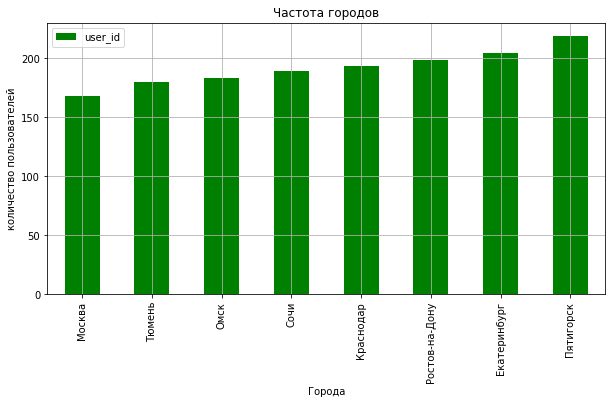

In [18]:
user_go.pivot_table(index='city', values = 'user_id', aggfunc = 'count').sort_values(by='user_id', 
     ascending=True).plot(title = 'Частота городов', kind = 'bar', grid = True, figsize=(10,5), color = 'green')
plt.xlabel('Города')
plt.ylabel('количество пользователей')
plt.show() 

**Вывод:** По изученным данным можно увидеть,что больше всего пользователей из города Пятигорск, после него Екатеринбург, Ростов-на-Дону, Краснодар и Сочи, Омск и Тюмень, и на самом последнем месте г. Москва.

In [19]:
# соотношение пользователей с подпиской и без подписки:
user_go['subscription_type'].describe()

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

<AxesSubplot:title={'center':'Подписка'}, ylabel='user_id'>

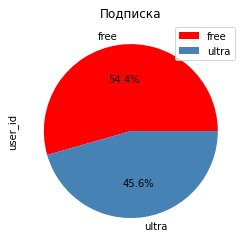

In [20]:
user_go.pivot_table(index='subscription_type', values = 'user_id', aggfunc = 'count') \
.plot(title = 'Подписка', kind = 'pie',  y='user_id', autopct='%1.1f%%',  colors = ['red', 'steelblue'])

**Вывод:** По изученным данным можно увидеть, что пользователей без подписки 54.4%, а с подпиской 45.6%.

In [21]:
# возраст пользователей:
user_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

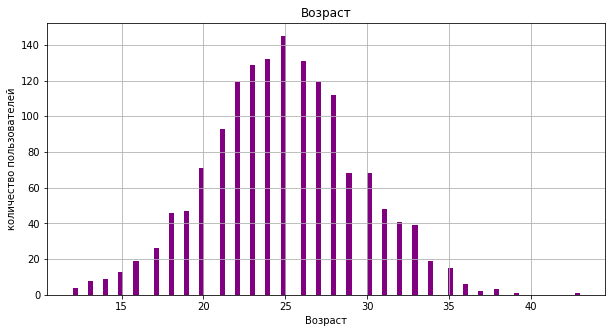

In [22]:
user_go['age'].plot(title = 'Возраст', kind = 'hist', bins=100, grid = True,
                         figsize=(10,5), color = 'Purple')
plt.xlabel('Возраст')
plt.ylabel('количество пользователей')
plt.show()

**Вывод:** По изученным данным можно увидеть, что пользователи в среднем имееют возраст 25 лет, медиана близка к среднему значению и график близок к нормальному распределению.

In [23]:
# расстояние, которое пользователь преодолел за одну поездку:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

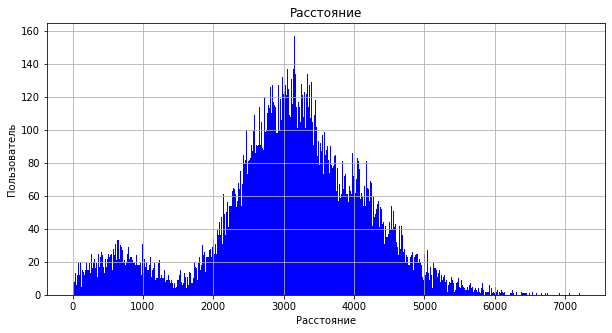

In [24]:
rides_go['distance'].plot(title = 'Расстояние', kind = 'hist', bins=500, grid = True,
                         figsize=(10,5), color = 'blue')
plt.xlabel('Расстояние')
plt.ylabel('Пользователь')
plt.show()

**Вывод:** По изученным данным можно увидеть, что пользователь в среднем преоделевает 3133.61 метра за одну поездку, минимальная поездка составила 0.86 метра, максимальная 7211.01 метра. Квартили равны 3133.61 и 3776.22 метра. Приблизительно от 1500 метра до 5500 график приближен к нормальному распределению.

In [25]:
# продолжительность поездок:
rides_go['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

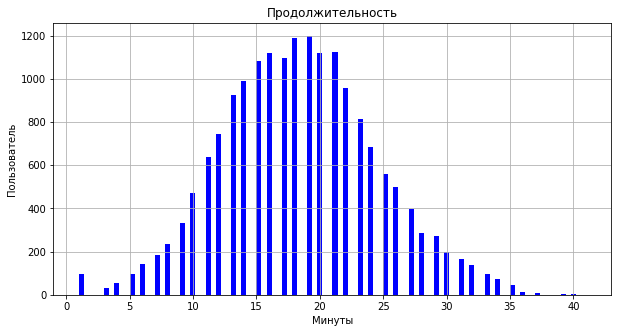

In [26]:
rides_go['duration'].plot(title = 'Продолжительность', kind = 'hist', bins=100, grid = True,
                         figsize=(10,5), color = 'blue')
plt.xlabel('Минуты')
plt.ylabel('Пользователь')
plt.show()

In [27]:
rides_go.query('duration == 1').head()

,user_id,distance,duration,date,month
6531,701,4196.45,1.0,2021-08-31,8
6570,704,4830.82,1.0,2021-10-14,10
6680,712,4684.00,1.0,2021-03-04,3
6695,713,5215.64,1.0,2021-02-25,2
6768,718,5197.44,1.0,2021-02-11,2


In [28]:
rides_go.query('duration == 1')['distance'].describe()

count      95.000000
mean     5113.176737
std       658.254223
min      4030.310000
25%      4611.510000
50%      5052.770000
75%      5488.460000
max      7211.010000
Name: distance, dtype: float64

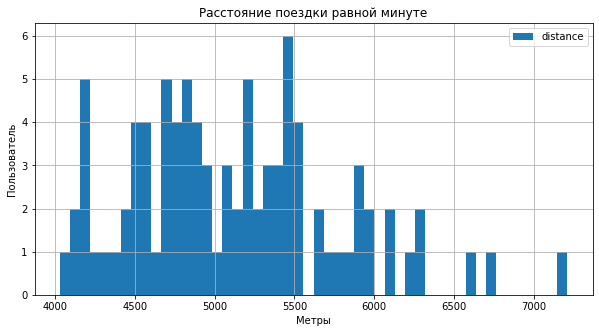

In [29]:
rides_go.query('duration == 1').pivot_table(index='user_id', values='distance').plot(grid=True, 
                                                                                     kind = 'hist', figsize=(10, 5), bins=50)
plt.title('Расстояние поездки равной минуте')
plt.xlabel('Метры')
plt.ylabel('Пользователь')
plt.show()

**Вывод:** По изученным данным можно увидеть, что в среднем продолжительность одной поездки 17 минут, медиана близка к среднему значению, график близок к нормальному распределению. Можно увидеть аномальные значения равной 1 минуте около 100 пользователей. По выше данным и графику, можно увидеть, что поездки в 1 минуте составляли от 4030.31 до 7211.01 метра. Что кажется практически невозможным. Необходимо данные передать сервису самокатов GoFast, чтобы проверили и устранили данную аномалию.

**Промежуточный вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. Больше всего пользователей из города Пятигорск, после него Екатеринбург, Ростов-на-Дону, Краснодар и Сочи, Омск и Тюмень, и на самом последнем месте г. Москва.
2. Пользователей без подписки 54.4%, а с подпиской 45.6%.
3. Пользователи в среднем имееют возраст 25 лет, медиана близка к среднему значению и график близок к нормальному распределению.
4. Пользователь в среднем преоделевает 3133.61 метра за одну поездку, минимальная поездка составила 0.86 метра, максимальная 7211.01 метра. Квартили равны 3133.61 и 3776.22 метра. Приблизительно от 1500 метра до 5500 график приближен к нормальному распределению.
5. В среднем продолжительность одной поездки 17 минут, медиана близка к среднему значению, график близок к нормальному распределению. Можно увидеть аномальные значения, меньше 1 минуты около 100 пользователей.
</div>


#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтемся методом merge().

In [30]:
df = user_go.merge(rides_go, on='user_id')
df = df.merge(subscriptions_go, on='subscription_type')
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [32]:
df.duplicated().sum()

0

##### Создайте ещё два датафрейма из датафрейма:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [33]:
# с данными о пользователях без подписки
user_go_free = df[df['subscription_type'] == 'free']
user_go_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18.0,2021-02-14,2,8,50,0


In [34]:
user_go_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [35]:
# с данными о пользователях c подпиской
user_go_ultra = df[df['subscription_type'] == 'ultra']
user_go_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [36]:
user_go_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [37]:
# продолжительность поездок без подписки:
user_go_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [38]:
# продолжительность поездок c подпиской:
user_go_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

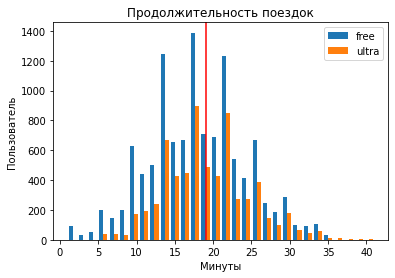

In [39]:
plt.hist([user_go_free['duration'], user_go_ultra['duration']], bins=30, label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.xlabel('Минуты')
plt.ylabel('Пользователь')
plt.title('Продолжительность поездок')
plt.axvline(x=19, ymin=0.0, ymax=1.0, color='red')
plt.show()

In [40]:
# расстояние, которое пользователь преодолел за одну поездку без подписки:
user_go_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [41]:
# расстояние, которое пользователь преодолел за одну поездку с подпиской:
user_go_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

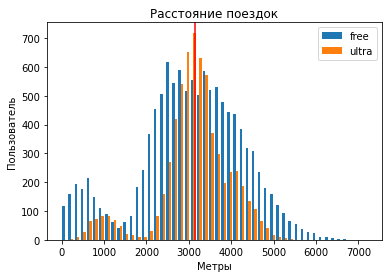

In [42]:
plt.hist([user_go_free['distance'], user_go_ultra['distance']], bins=50, label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.xlabel('Метры')
plt.ylabel('Пользователь')
plt.title('Расстояние поездок')
plt.axvline(x=3148.64, ymin=0.0, ymax=1.0, color='red')
plt.show()

**Промежуточный вывод:**
<p></p>

<div style="border:solid green 2px; padding: 10px">
    
1. Медианное значение продолжительности поездки без подписки составило 17 минут, с подпиской 18 минут.
2. Медианное значение расстояния без подписки составило 3114.65 метра, с подпиской 3148.64 метра.
3. Стандартное отклонение у расстояния без подписки - 1246.17, с подпиской - 836.90. Получается с подпиской имеется меньше разброс данных.
4. По графику, где оцениваем расстояние, видно, что смещение центра у данных с подпиской и без подписок около 500 метров. 
    
</div>

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках

In [43]:
dt_revenue = df.pivot_table(index=('user_id', 'month'), values=('distance', 'duration', 'minute_price', 'start_ride_price', 
    'subscription_fee'), aggfunc=({'distance':{'count','sum'}, 'duration': 'sum', 'minute_price': 'mean', 
                                   'start_ride_price': 'mean', 'subscription_fee': 'mean'}))
dt_revenue.columns = ['count', 'distance_sum', 'duration_sum', 'minute_price', 'start_ride_price', 'subscription_fee']              
dt_revenue.head()   

count  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2       7027.51          42.0             6   
        4          1        754.16           7.0             6   
        8          2       6723.47          46.0             6   
        10         2       5809.91          32.0             6   
        11         3       7003.50          56.0             6   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199

##### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [44]:
dt_revenue['revenue_month'] = dt_revenue['start_ride_price'] * dt_revenue['count'] \
+ dt_revenue['minute_price'] * dt_revenue['duration_sum'] + dt_revenue['subscription_fee']
dt_revenue.head()

count  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2       7027.51          42.0             6   
        4          1        754.16           7.0             6   
        8          2       6723.47          46.0             6   
        10         2       5809.91          32.0             6   
        11         3       7003.50          56.0             6   

               start_ride_price  subscription_fee  revenue_month  
user_id month                                                     
1       1                     0               199          451.0  
        4                     0               199          241.0  
        8                     0               199          475.0  
        10                    0               199          391.0  
        11                    0               199          535.0

In [45]:
dt_revenue['revenue_month'].sum()

3878641.0

**Вывод:** За год выручка составила 3878641 рублей.   


#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0: Продолжительность поездки пользователя с подпиской равна продолжительности без подписки

H1: Продолжительность поездки пользователя с подпиской больше продолжительности без подписки

In [46]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(user_go_ultra['duration'], user_go_free['duration'], equal_var=True, alternative = 'greater')

print('Средняя продолжительность поездки с подпиской:', np.mean(user_go_ultra['duration']).round(0))
print('Средняя продолжительность поездки без подписки:', np.mean(user_go_free['duration']).round(0))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя продолжительность поездки с подпиской: 19.0
Средняя продолжительность поездки без подписки: 18.0
p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Вывод:** Отвергаем нулевую гипотезу. Получается пользователи с подпиской тратят больше времени на поездку, чем пользователи без подписки.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

H0: Расстояние поездки пользователя с подпиской равна 3130 метров.

H1: Расстояние поездки пользователя с подпиской больше 3130 метров.

In [47]:
distance = 3130

alpha = 0.05 # укажем уровень статистической значимости

results = st.ttest_1samp(
    user_go_ultra['distance'], 
    distance, alternative='greater')

print('Среднее расстояние поездки с подпиской:', np.mean(user_go_ultra['distance']).round(2))

print('p-значение:', results.pvalue) 

if results.pvalue < alpha: # сравним полученный p-value и уровень значимости):
    print('Отвергаем нулевую гипотезу: Расстояние поездки пользователя с подпиской больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Расстояние поездки пользователя с подпиской равна 3130 метров')



Среднее расстояние поездки с подпиской: 3115.45
p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу: Расстояние поездки пользователя с подпиской равна 3130 метров


**Вывод:** Не получилось отвергнуть нулевую гипотезу. Среднее расстояние поездки пользователя с подпиской равна 3130 метров и расстояние не превышается этому значению.

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H0: Месячная выручка с подпиской равно месячной выручки без подписки.

H1: Месячная выручка с подпиской больше месячной без подписки.

In [48]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(dt_revenue.loc[dt_revenue['subscription_fee'] > 0, 'revenue_month'], 
                       dt_revenue.loc[dt_revenue['subscription_fee'] == 0, 'revenue_month'],
                       equal_var=True, alternative = 'greater')

print('Средняя месячная выручка с подпиской:', np.mean(dt_revenue.loc[dt_revenue['subscription_fee'] > 0,
                                                                      'revenue_month']).round(2))
print('Средняя месячная выручка без подписки:', np.mean(dt_revenue.loc[dt_revenue['subscription_fee'] == 0,
                                                                       'revenue_month']).round(2))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средняя месячная выручка с подпиской: 362.79
Средняя месячная выручка без подписки: 328.64
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** Отвергаем нулевую гипотезу. Получается, что средняя месячная выручка с подпиской больше, чем без подписки.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Нам известно, что два параметра: количество обращений до обновления и после него. Это две зависимые парные выбоки. Если оба набора одинаковые по размеру: каждое измерение должно быть проведено до и после изменения. То можно применить метод scipy.stats.ttest_rel(), а если не одинаковое, то воспользуемся методом scipy.stats.ttest_ind(). 

H0: количество обращений после обновления равно до обновления.

H1: количество обращений после обновления меньше, чем до обновления. В методе следует указать alternative="less".


**Общий вывод:**
<p></p>

<div style="border:solid green 3px; padding: 10px">
    
*1. Изучили общую информацию:*
    
- Таблицы состоят из 1565 (user_go), 18068 (rides_go) и 2 (subscriptions_go) записей.
- Найдено 31 дубликата в таблице user_go.
- Пропусков не найдено.
- Есть некорректный тип данных у таблицы rides_go в столбце date.
- Название столбцов корректны.
    
*2. Выполнили предобработку данных:**   
- Удалили 31 дубликата в таблице user_go.
- Изменили тип данных у таблицы rides_go в столбце date, duration и округлили до двух знаков у столбца distance. 
- Добавили в rides_go новый столбец.   
    
*3. Провели исследовательский анализ данных:*   
- Больше всего пользователей из города Пятигорск, после него Екатеринбург, Ростов-на-Дону, Краснодар и Сочи, Омск и Тюмень, и на самом последнем месте г. Москва.
- Пользователей без подписки 54.4%, а с подпиской 45.6%.
- Пользователи в среднем имееют возраст 25 лет, медиана близка к среднему значению и график близок к нормальному распределению.
- Пользователь в среднем преоделевает 3133.61 метра за одну поездку, минимальная поездка составила 0.86 метра, максимальная 7211.01 метра. Квартили равны 3133.61 и 3776.22 метра. Приблизительно от 1500 метра до 5500 график приближен к нормальному распределению.
- В среднем продолжительность одной поездки 17 минут, медиана близка к среднему значению, график близок к нормальному распределению. Можно увидеть аномальные значения, равной 1 минуте около 100 пользователей. Поездки в 1 минуте составляли от 4030.31 до 7211.01 метра. Что кажется практически невозможным. Необходимо данные передать сервису самокатов GoFast, чтобы проверили и устранили данную аномалию.
    
      
*4. Объединили данные и провели их анализ:*    
    
- Медианное значение продолжительности поездки без подписки составило 17 минут, с подпиской 18 минут.
- Медианное значение расстояния без подписки составило 3114.65 метра, с подпиской 3148.64 метра.
- Стандартное отклонение у расстояния без подписки - 1246.17, с подпиской - 836.90. Получается с подпиской имеется меньше разброс данных.
- По графику, где оцениваем расстояние, видно, что смещение центра у данных с подпиской и без подписок около 500 метров. 
    
*5. Сделали подсчёт выручки:*
    
- За год выручка составила 3878641 рублей.   

*6. Проверили гипотезы:*   
    
- Пользователи с подпиской тратят больше времени на поездку, чем пользователи без подписки.
- Среднее расстояние поездки пользователя с подпиской равна 3130 метров и расстояние не превышается этому значению.
- Средняя месячная выручка с подпиской больше, чем без подписки.
    
    
    
 